# Robust Registration

# Setting

This week, we define a new, more robust, registration method, and provide a statistic for quantifying the effectiveness of our registration on the within subject level to approximate when registration failures occur, so that we can adapt our pipeline accordingly. 

## Registration Score

We do not define a loss function, however, we define a performance metric, the registration score $r$, that determines the effectiveness of a given registration. The intuition of why we use a score instead of a loss function is that we want registration to "better fit", which lends itself better to the notion of "maximizing a score" than "minimizing a loss". Given input data $A$ and a reference $B$ that we have registered $A$ to, to determine the registration score $r_\psi(A, B)$ for a registration method $\psi$ we compute:

\begin{align}
    r_\psi(A,B) = \frac{A \cap B}{A \cup B}
\end{align}

## Registration Goal

Our registration goal is to be able to identify when we have a failure of registration in a more advanced registration metric, and to appropriately resort to a more robust method to ensure that processing does not fail. 

## Statistical Goal

Our statistical goal is, at the self-registration and the template registration level, to ensure that $r_\psi(A, B) > 0.75$. This essentially is to avert the situation of complete registrtation failure; that is, we assume that if a registration works, it will generally work well, but if it fails, it will generally fail quite significantly. Basically, we expect this statistic to only be a guiding metric; that is, we want to pipeline choice to almost always choose the default registration method, and only resort to an alternative when the brain is completely distorted. This will ensure that we obtain fewer "total registration failures" during the course of our analysis.


## Computational Challenges

The main computational challenge of the metric itself is that implicitly, we only care about the registration quality of the brain. As such, we only want to compute brain extractions as needed. So, we restrict ourselves to perform the second computation (the "fail-safe" case in the event that some registration's score is under $0.8$) only when the first computation fails (that is, we will compute quality control on the first metric, and only perform the second when the quality control reports a possible failure on the first). 

## Desiderata

1. Since this algorithm is being worked in at several stages of the pipeline, we want it to be fast as well as memory efficient. We want to have to make minimal calls to "bet" since "bet" is expensive computationally. 
2. We would certainly prefer for the entire series of registration calls to be as memory and time efficient as possible using a single core. 

# Robust Registration Procedure

## Self-Registration procedure

In this case, for self-registration our reference is the $T1w$ brain of the current subject. Optimally, we want to use $epi-reg$ over basic $flirt$, since $epi-reg$ allows us alignment of brain boundaries (which will give us higher quality inferences down the line). However, epi-reg can perform quite poorly sometimes, particularly when the brain extraction of the anatomical slice is not high quality, and we want to be able to figure out when this is occuring. As such, we perform our boundary based registration, then compute our $r$ registration score, and if it is under $0.8$, we instead use a more generous locally optimised cost method. 

## Template-Registration procedure

In this case, our $B$ that we register to is the MNI152 brain. We would like to use $fnirt$ to register our brains, as $fnirt$ generally can allow better alignment of smaller scale features than a linear alignment, giving us better applicability of our inferences from the template-registered parcellations. When this score is under $0.8$, we use a $12$ $dof$ linear estimation intead.

## Algorithm

[algorithm](https://github.com/NeuroDataDesign/fngs/blob/master/docs/ebridge2/fngs_reg/week_0327/reg_algorithms.pdf)


# Appending

Note that the majority of the functions used here were already written and extensively tested by the FSL people. I am not an expert in registration hyperparameters, so I will not attempt to generate simulations that FSL's functions do what they say they will, and instead focus space on the results from the data. We analyze results:

# Self Registration 

## BNU 1

Note here that registration proceeds as expected. Our local optimisation is good, and our bbr provides a similar fit. Note that the registration scores are relatively close and as such nothing is concerning. Note that the bbr provides slightly closer fit of the individual brain gyri than the locally optimising, and both are pretty close to the T1w brain. Scores here are $0.855$ for the bbr on top, and $0.886$ for the local optimised on the bottom. 

bbr, score=0.812


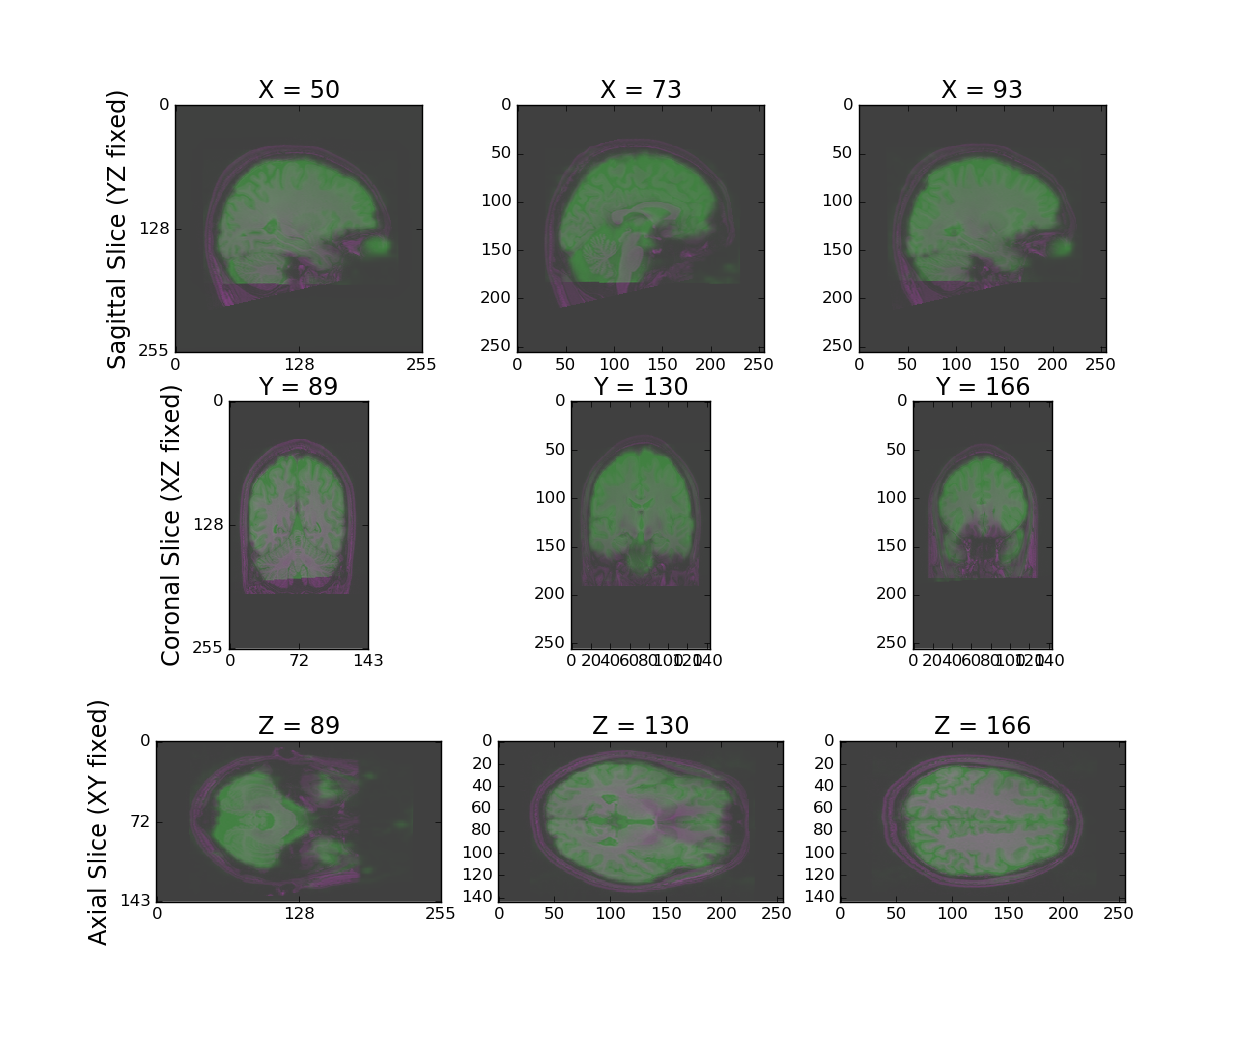

local, score=0.840


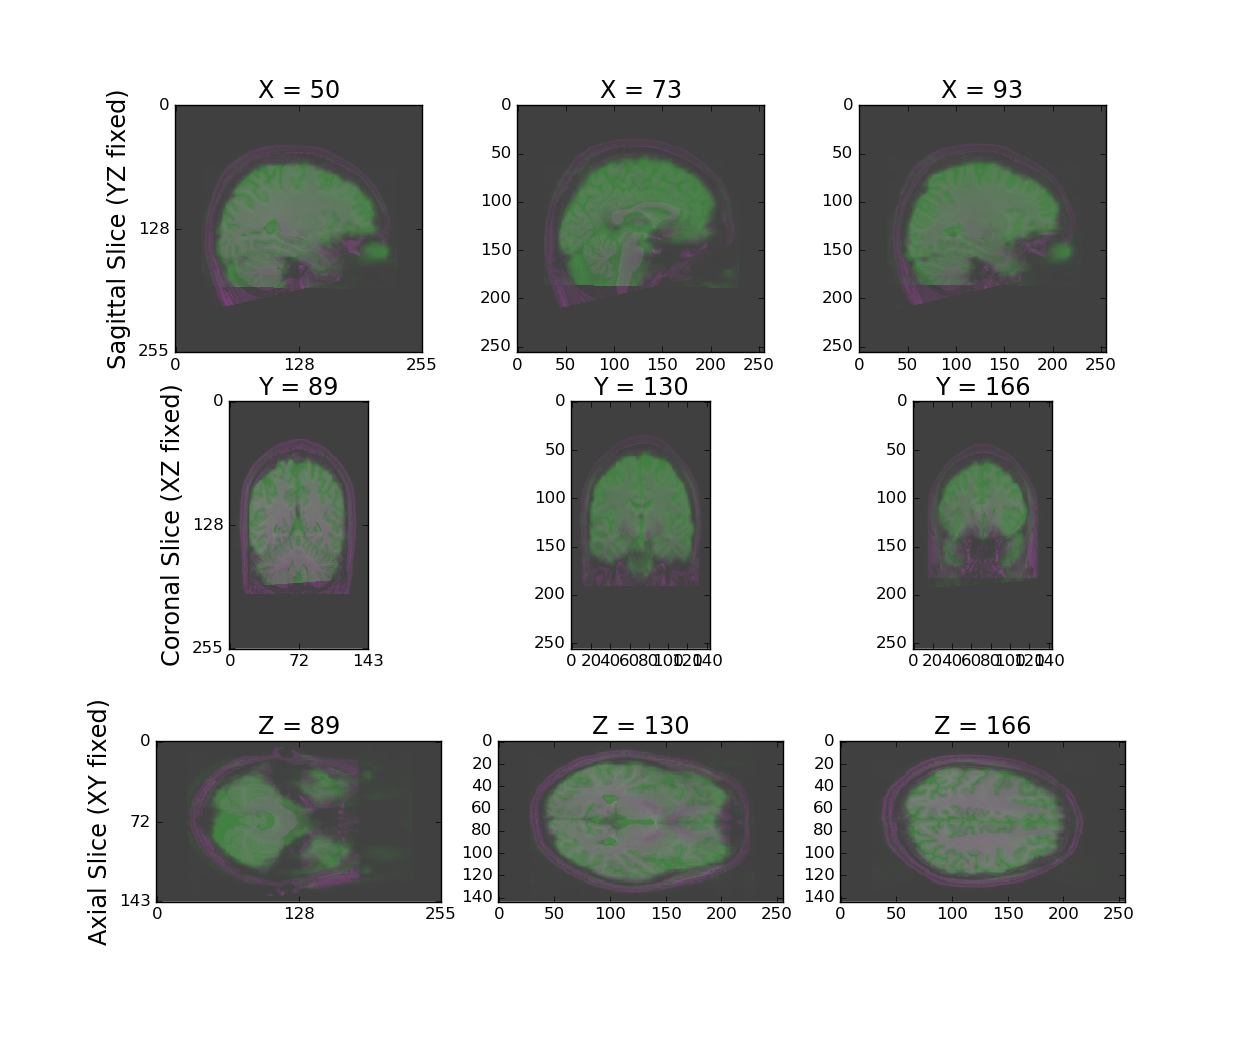

In [8]:
from IPython.display import Image, display

print "bbr, score=0.812"
display(Image(filename='/data/BNU_sub/BNU_single/qa/rest/reg/func/align/self/bbr_score_812/rest_preproc_self-aligned_bbr.png'))
print "local, score=0.840"
display(Image(filename='/data/BNU_sub/BNU_single/qa/rest/reg/func/align/self/local_score_840/rest_preproc_self-aligned_local.png'))

## HNU 1

Note here that registration proceeds as expected. Our local optimisation is good, and our bbr provides a similar fit. Note that the registration scores are relatively close and as such nothing is concerning. Note that the bbr provides slightly closer fit of the individual brain gyri than the locally optimising, and both are pretty close to the T1w brain. Scores here are $0.810$ for the bbr on top, and $0.838$ for the local optimised on the bottom. 

bbr, score = 0.810


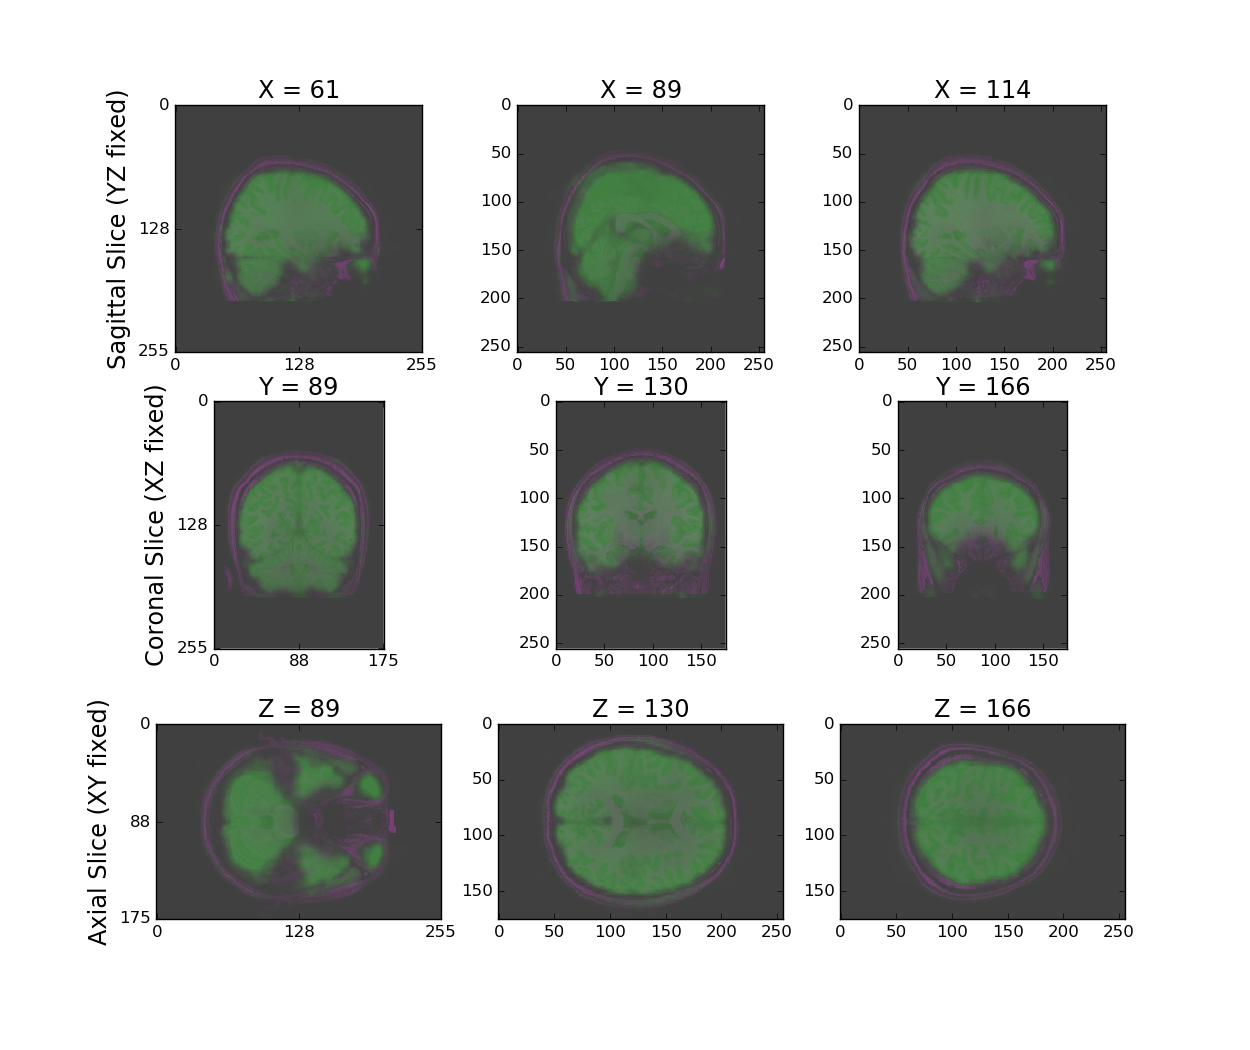

local, score=0.838


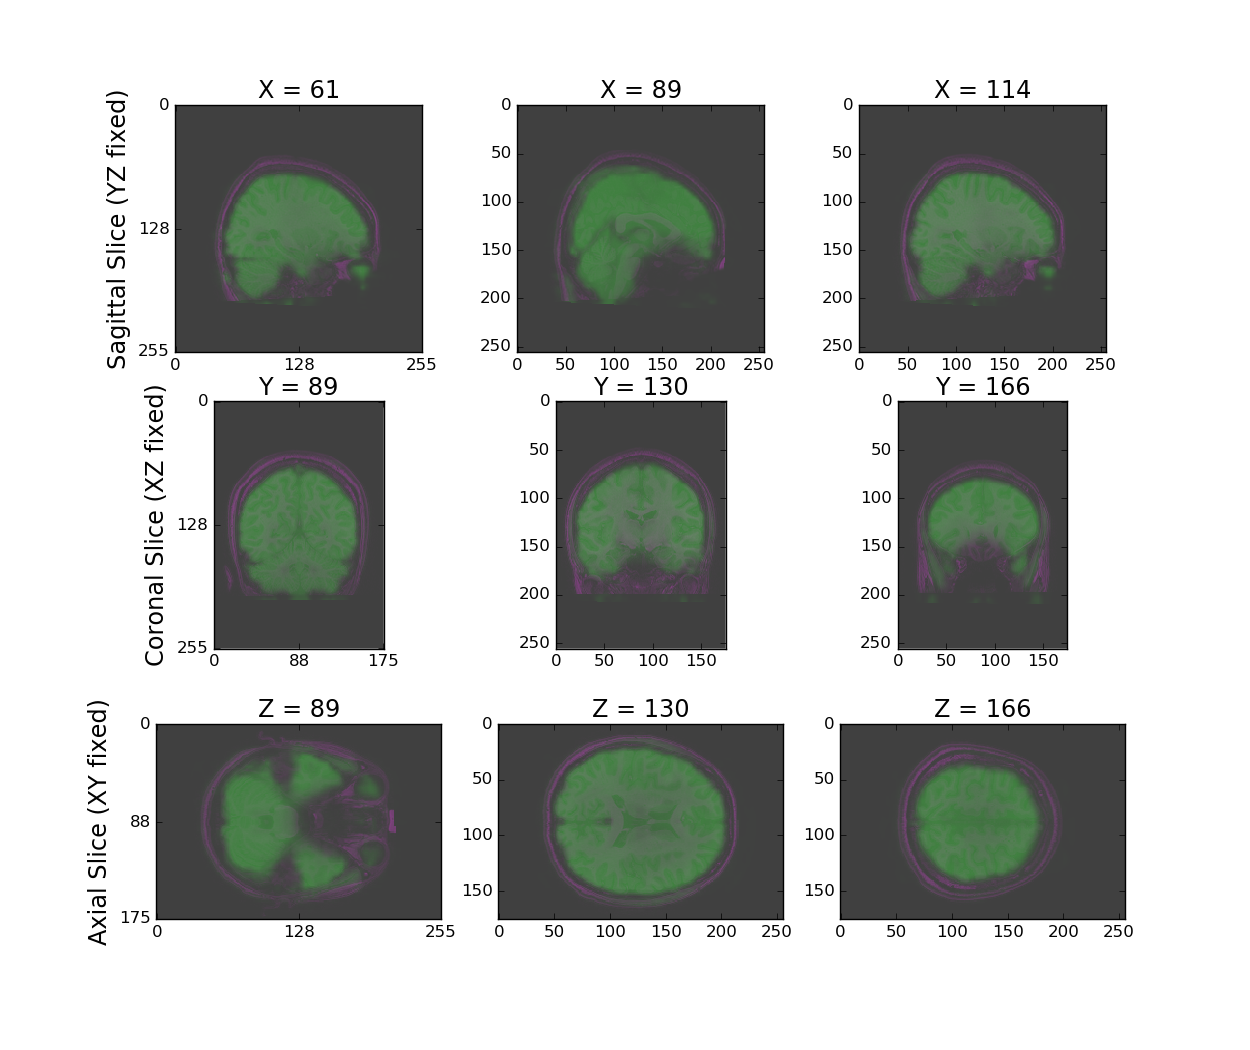

In [7]:
from IPython.display import Image, display

print "bbr, score = 0.810"
display(Image(filename='/data/HNU_sub/HNU_single/qa/rest_reduced/reg/func/align/self/bbr_score_810/rest_reduced_preproc_self-aligned_bbr.png'))
print "local, score=0.838"
display(Image(filename='/data/HNU_sub/HNU_single/qa/rest_reduced/reg/func/align/self/local_score_838/rest_reduced_preproc_self-aligned_local.png'))

## DC 1

Note here that registration proceeds as expected. Our local optimisation is good, and our bbr provides a similar fit. Note that the registration scores are relatively close and as such nothing is concerning. Note that the bbr provides slightly closer fit of the individual brain gyri than the locally optimising, and both are pretty close to the T1w brain. Scores here are $0.855$ for the bbr on top, and $0.880$ for the local optimised on the bottom. 

bbr, score = 0.855


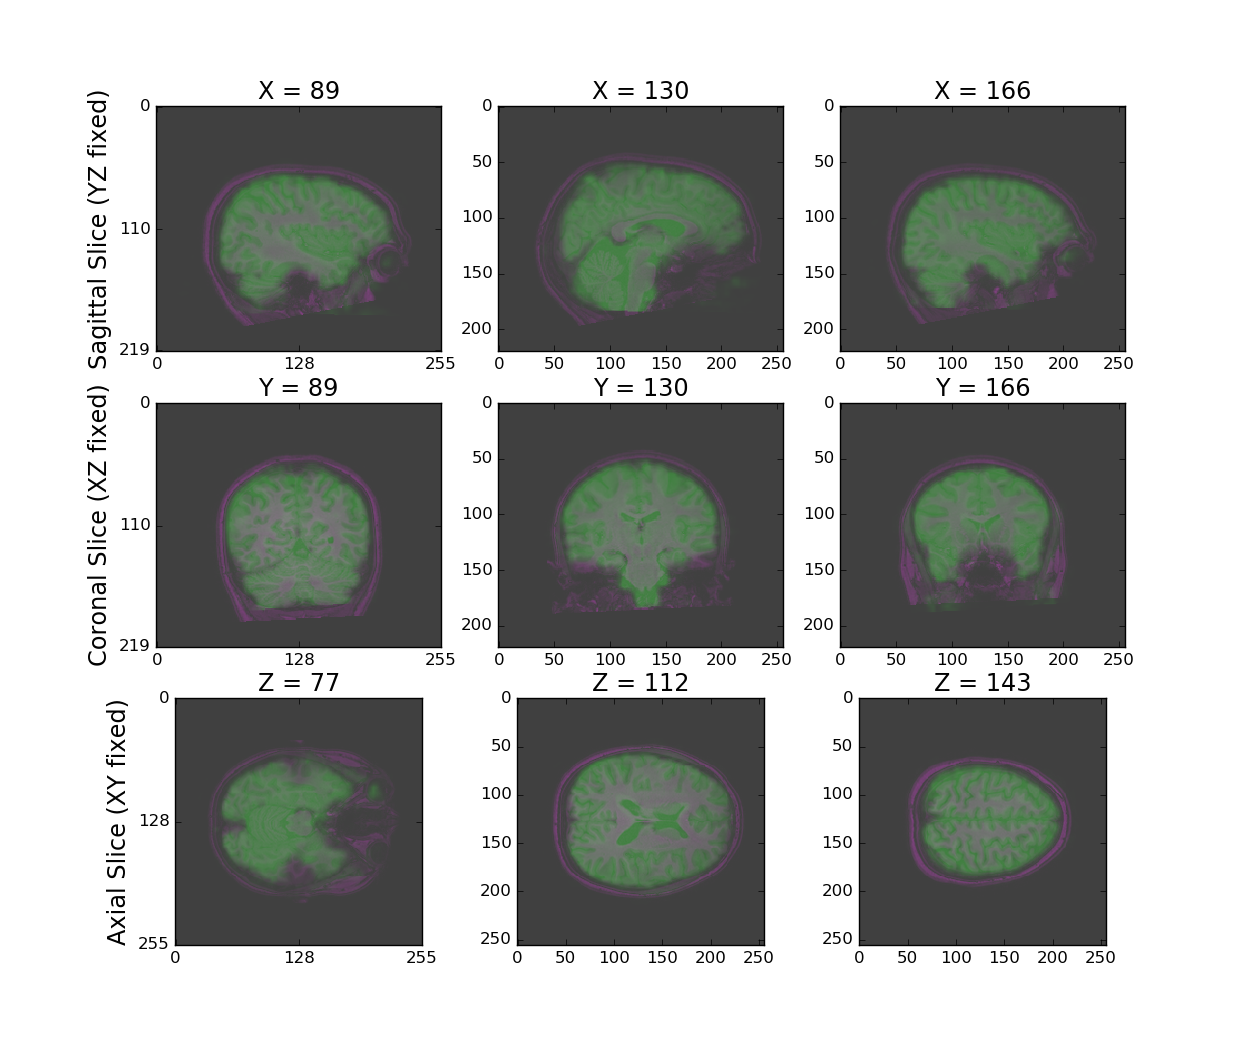

local, score=0.880


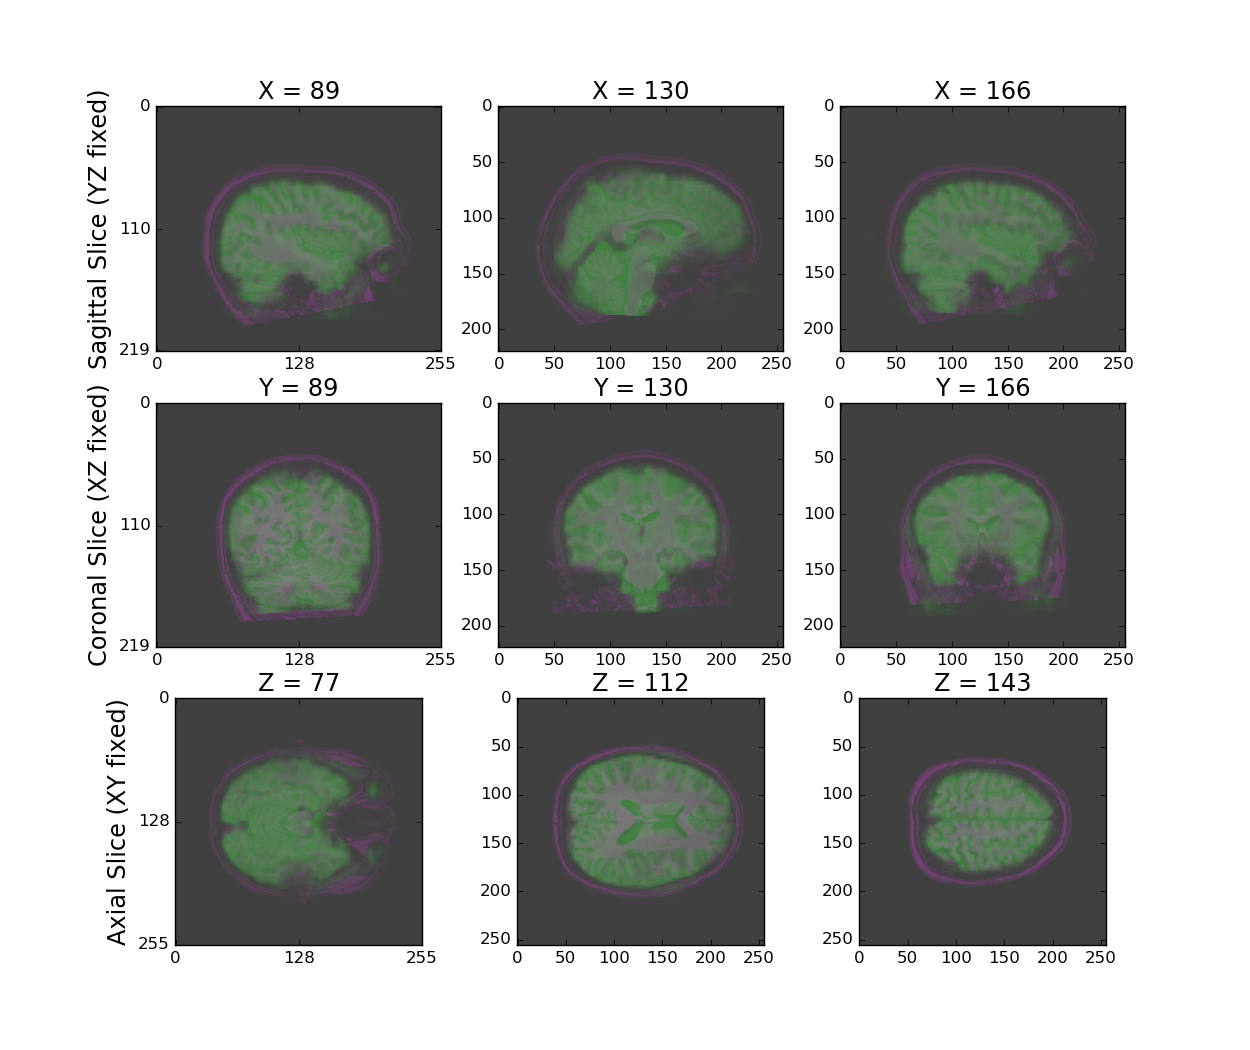

In [9]:
from IPython.display import Image, display

print "bbr, score = 0.855"
display(Image(filename='/data/DC_sub/DC_single/qa/rest/reg/func/align/self/bbr_score_855/rest_preproc_self-aligned_bbr.png'))
print "local, score=0.880"
display(Image(filename='/data/DC_sub/DC_single/qa/rest/reg/func/align/self/local_score_886/rest_preproc_self-aligned_local.png'))

## NKI 1

Note here that registration proceeds as expected. Our local optimisation is good, and our bbr provides a similar fit. Note that the registration scores are relatively close and as such nothing is concerning. Note that the bbr provides slightly closer fit of the individual brain gyri than the locally optimising, and both are pretty close to the T1w brain. Scores here are $0.808$ for the bbr on top, and $0.846$ for the local optimised on the bottom. 

bbr, score = 0.808


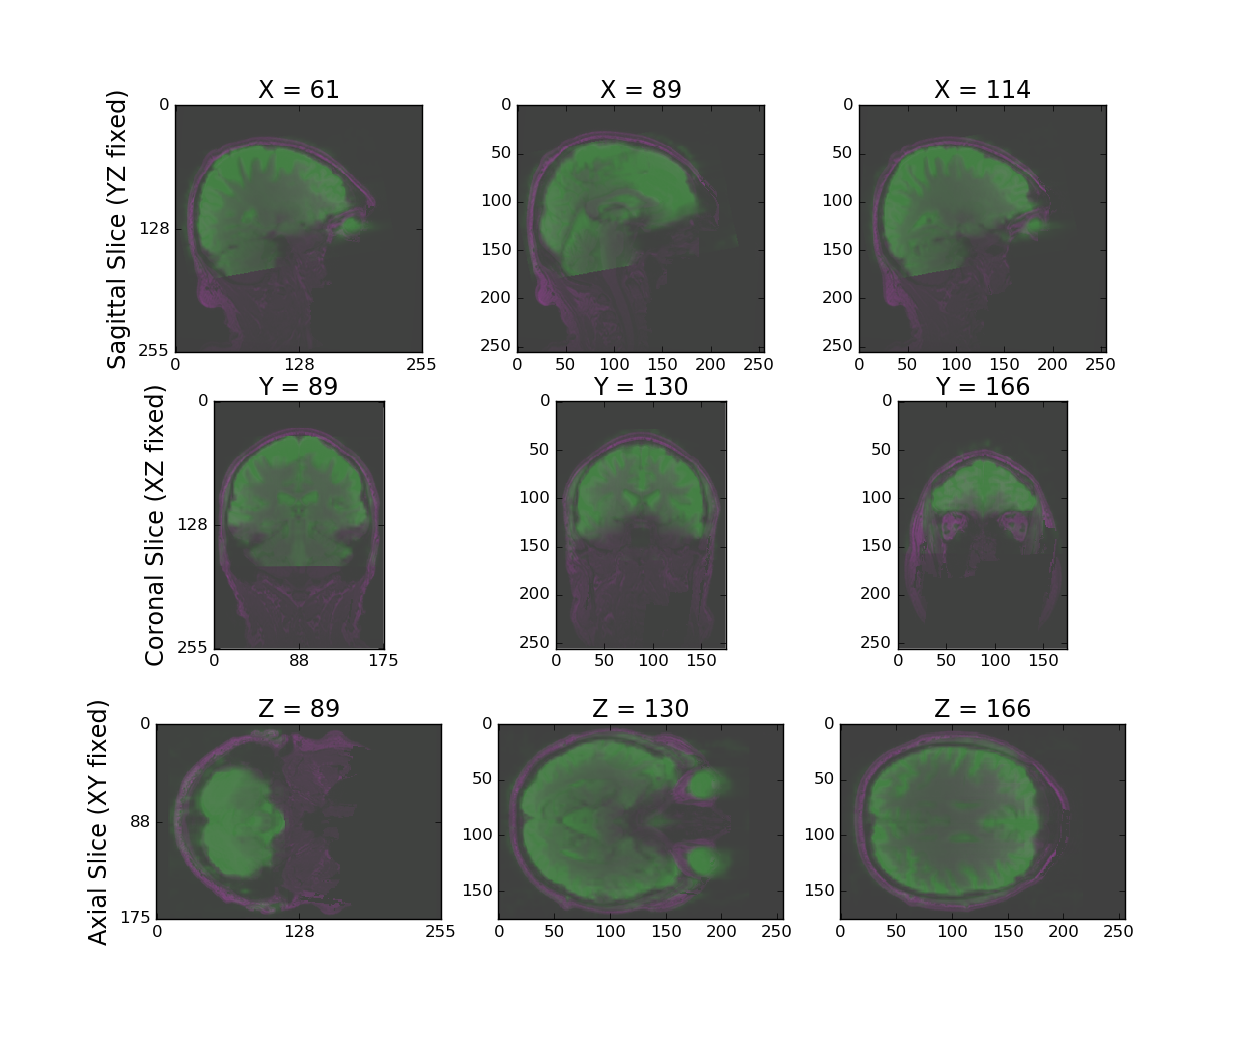

local, score=0.846


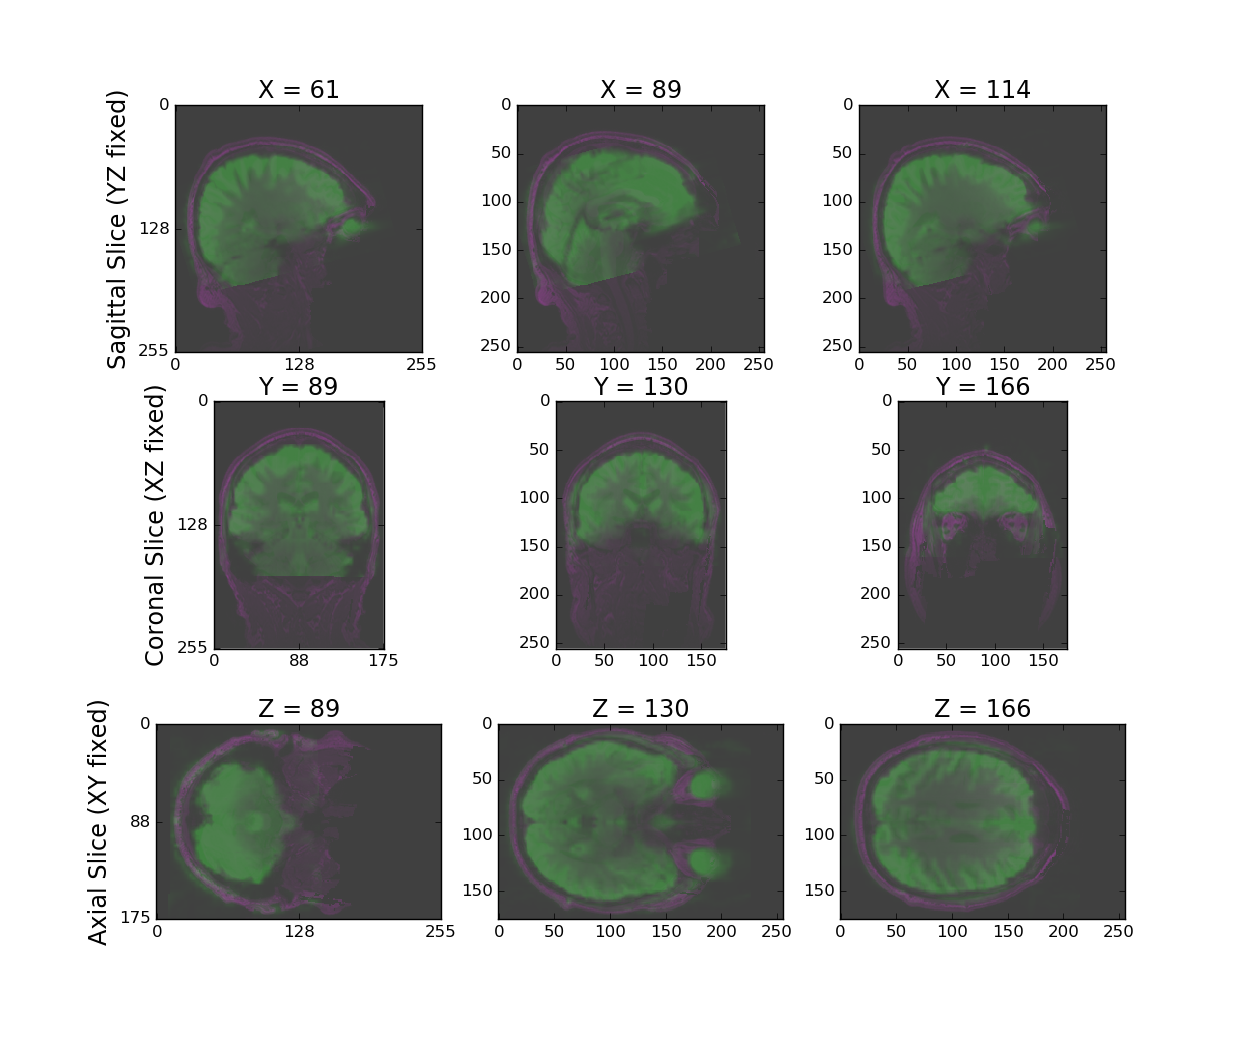

In [12]:
from IPython.display import Image, display

print "bbr, score = 0.808"
display(Image(filename='/data/NKI_sub/NKI_single/qa/rest/reg/func/align/self/bbr_score_808/rest_preproc_self-aligned_bbr.png'))
print "local, score=0.846"
display(Image(filename='/data/NKI_sub/NKI_single/qa/rest/reg/func/align/self/local_score_846/rest_preproc_self-aligned_local.png'))

# Science of Learning

Note here that registration does not proceed as expected. Our local optimisation is good, but our bbr suffers to fit the model due to the reduced field of view in the raw image. Note that the fMRI image here covers less of the brain and cuts off in the middle of the hindbrain. FLIRT will then try to fit this cut off edge past the actual brain, resulting in the weird fit we see. In this case, the more restrictive local optimisation function manages to accurately register in this situation, since it fits for "local voxels" (that is, it attempts to fit clusters of voxels and not just each voxel itself, so it ends up matching "brain shapes" more than just pixels). Scores here are $0.749$ for the bbr on top, and $0.809$ for the local optimised on the bottom. Also, note that the images were taken with backwards dimensions for each scan. The images here have not been aligned to the template, so their orientation has not yet been standardized, and as such the unstandardized 

bbr, score = 0.749


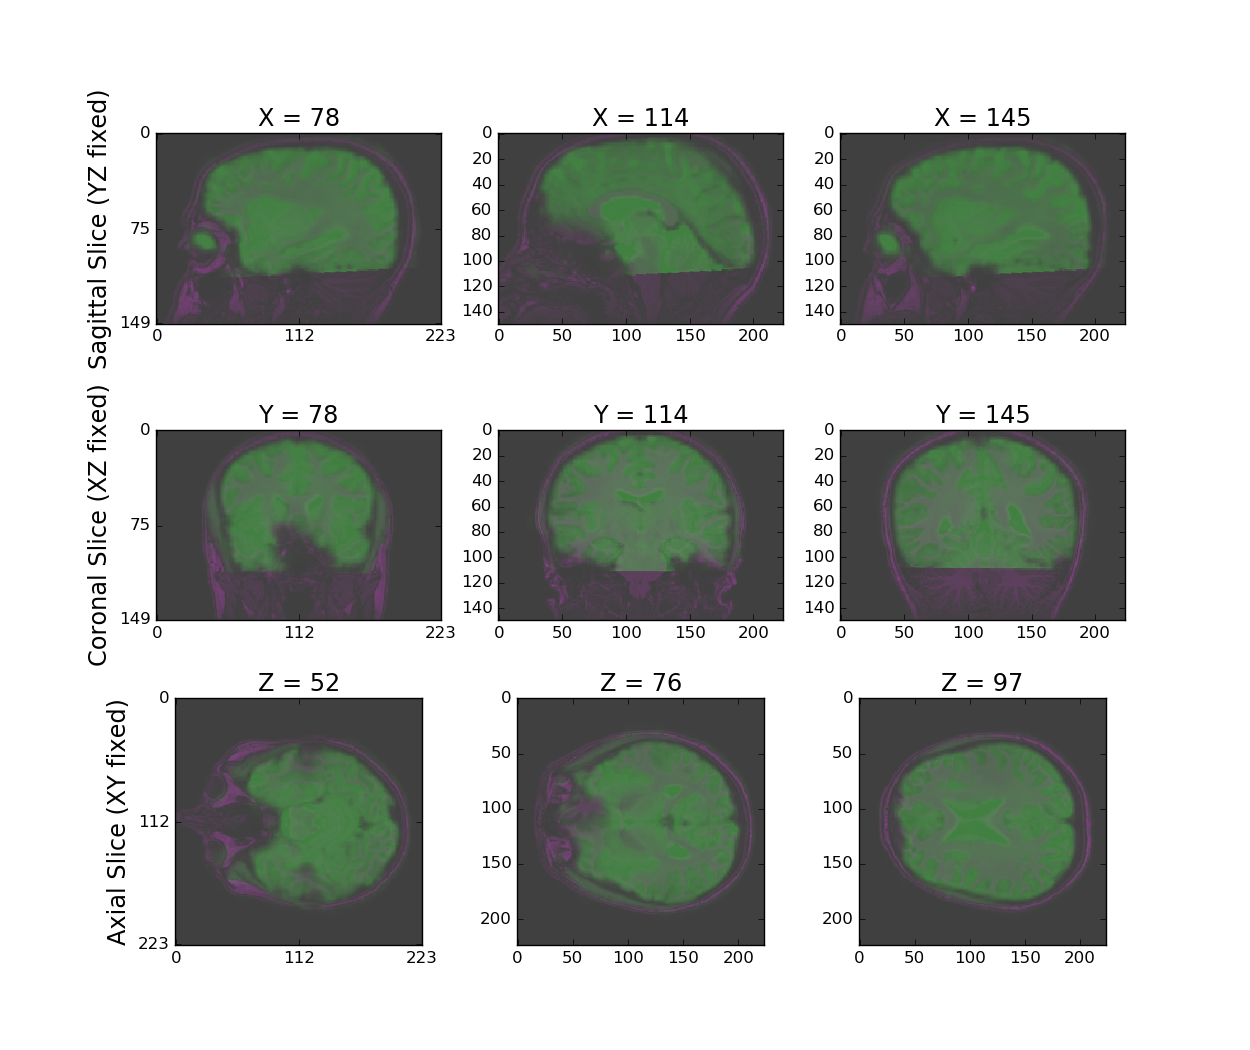

local, score=0.846


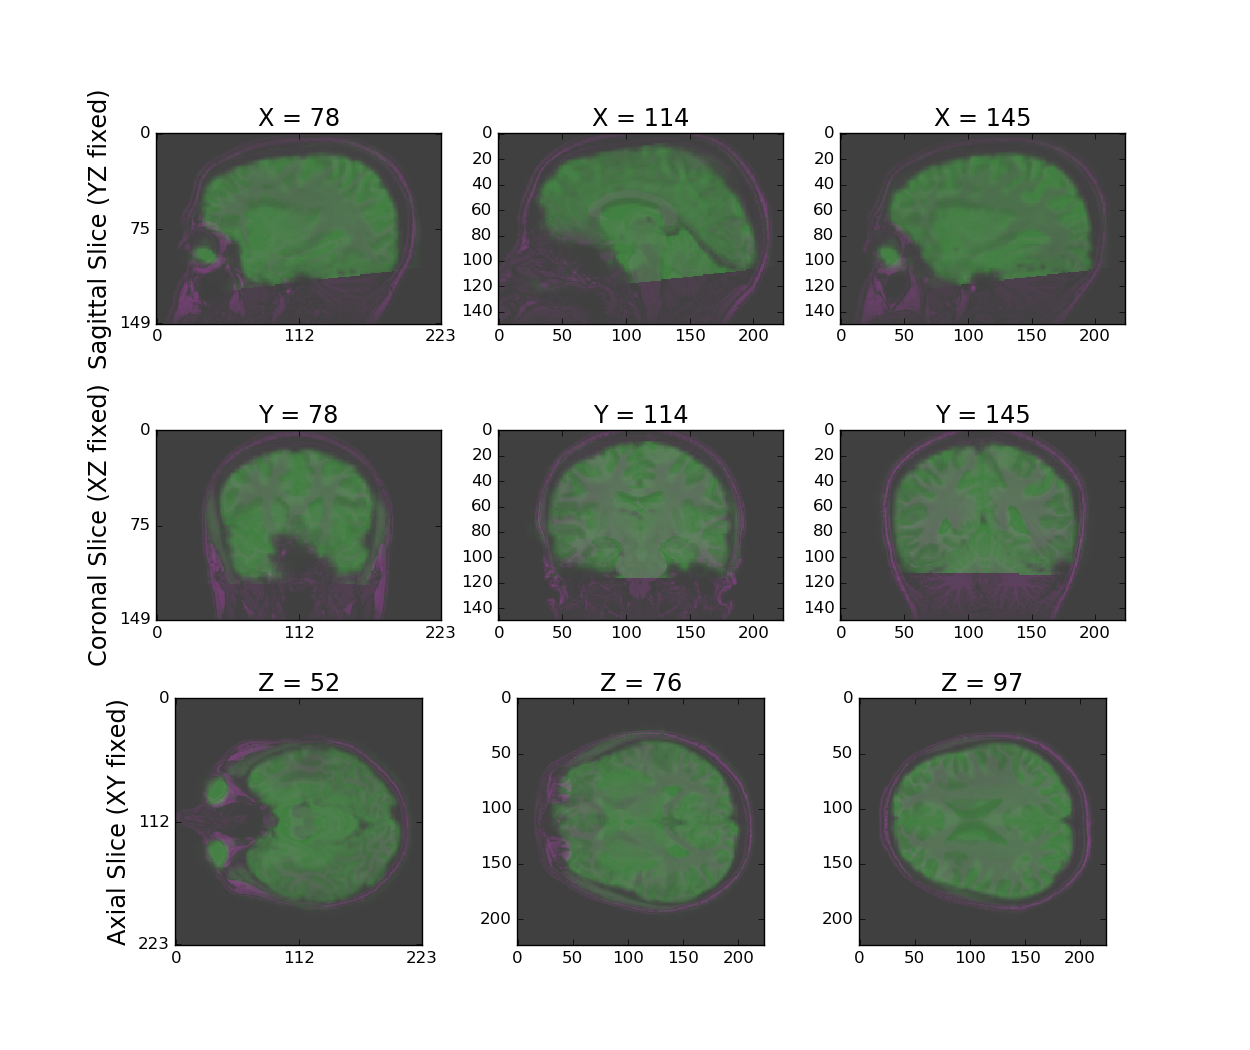

In [27]:
from IPython.display import Image, display

print "bbr, score = 0.749"
display(Image(filename='/data/sol/sol_single/qa/sub-15_func_run1/reg/func/align/self/bbr_score_749/sub-15_func_run1_preproc_self-aligned_bbr.png'))
print "local, score=0.846"
display(Image(filename='/data/sol/sol_single/qa/sub-15_func_run1/reg/func/align/self/local_score_809/sub-15_func_run1_preproc_self-aligned_local.png'))

## Comments

It is clear that local optimisation outperforms bbr on all of the cases. However what we have to note is that this is not designed to be a "comparative" statistic, but just an identifier of "failed" situations of registration. As such, if one cost function implicitly uses the assumptions made by our statistic (which, in this case, local optimization optimizes a similar cost function to our statistic, while bbr does not) then one algorithm will inherently just perform better on our metric. The relevance of this statistic is not to say "this 0.856 score is better than a 0.842 score", but rather, that this other 0.5 score clearly failed registration whereas this 0.88 did not. As such we would still prefer to use the boundary-based alignment when possible even if the entirity of the brain does not align quite as well. We note that it may be favorable to drop our threshold a bit, maybe down to around $0.7$ or $0.75$. However, of note is that visually while epireg definitely provides a slightly better registration, it is not entirely clear "how" much the significant increase in processing time (12 minutes last week, 30 minutes this week) and memory (10 gigs vs 20 gigs) is worth. 

# Template Registration 

## BNU 1

Note here that registration proceeds as expected. Our fnirt result is good.

fnirt, score = 0.855


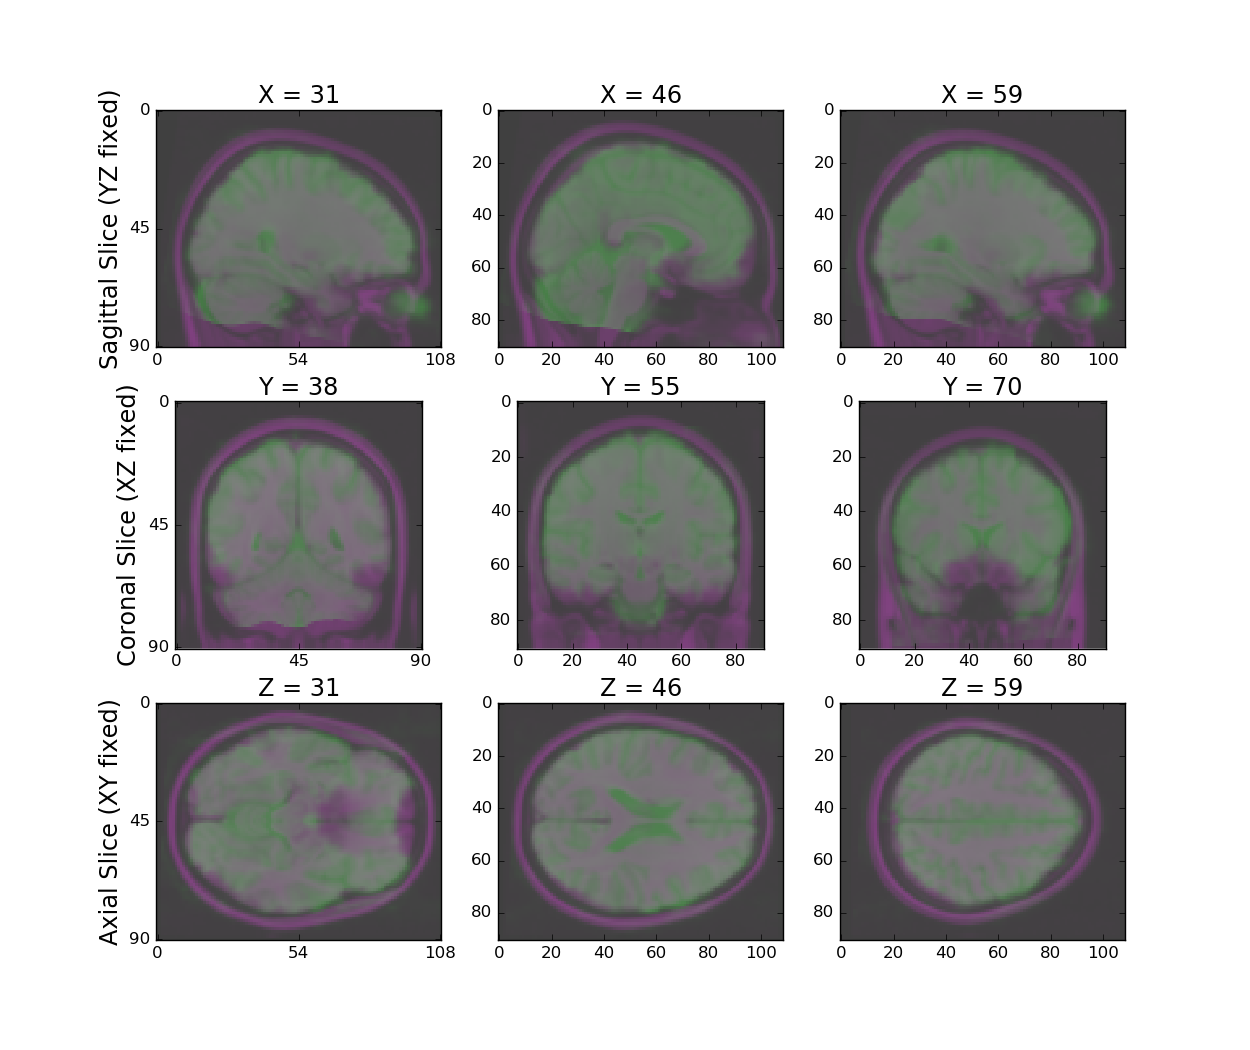

In [16]:
from IPython.display import Image, display

print "fnirt, score = 0.855"
display(Image(filename='/data/BNU_sub/BNU_single/qa/rest/reg/func/align/temp/nonlinear_score_855/rest_preproc_temp-aligned_nonlinear.png'))

## HNU 1

Note here that registration proceeds as expected. Our fnirt result is good.

fnirt, score = 0.876


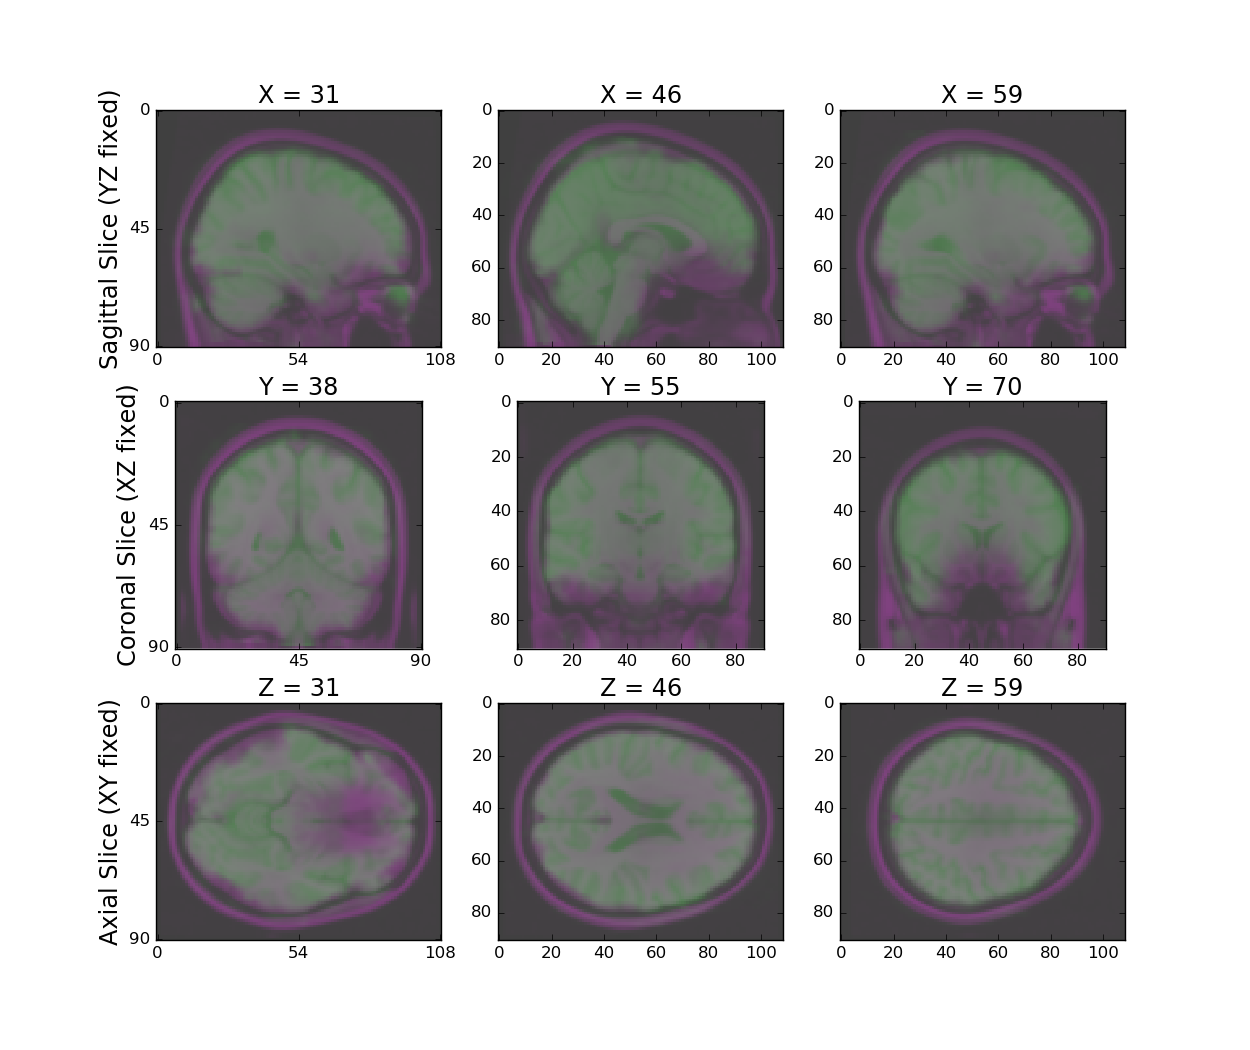

In [18]:
from IPython.display import Image, display

print "fnirt, score = 0.876"
display(Image(filename='/data/HNU_sub/HNU_single/qa/rest_reduced/reg/func/align/temp/nonlinear_score_876/rest_reduced_preproc_temp-aligned_nonlinear.png'))

## DC 1

Note here that registration proceeds as expected. Our fnirt result is good.

fnirt, score = 0.883


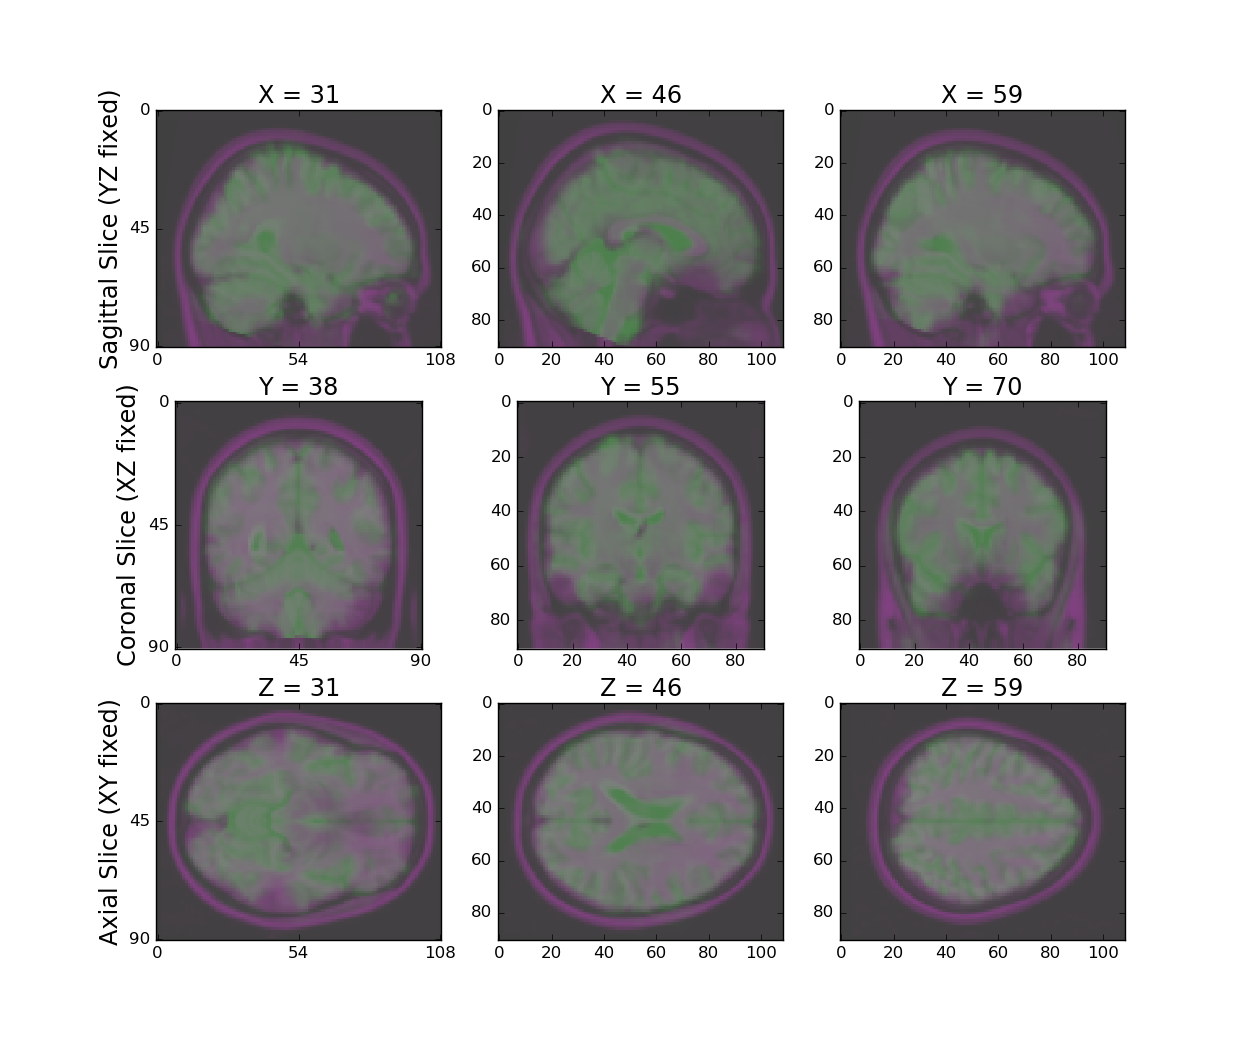

In [21]:
from IPython.display import Image, display

print "fnirt, score = 0.883"
display(Image(filename='/data/DC_sub/DC_single/qa/rest/reg/func/align/temp/nonlinear_score_883/rest_preproc_temp-aligned_nonlinear.png'))

## NKI 1

Note here that registration fails by our criterion, and is only 0.796. As this is under 0.8, the result is recomputed linearly, and we obtain a slightly better registration of 0.798. However, as we previously discussed, the metric is not comparative, so a 0.798 and a 0.796 are really not that much different. We should probably drop the penalty a little bit, as these brains both look about equal quality. 

fnirt, score = 0.796


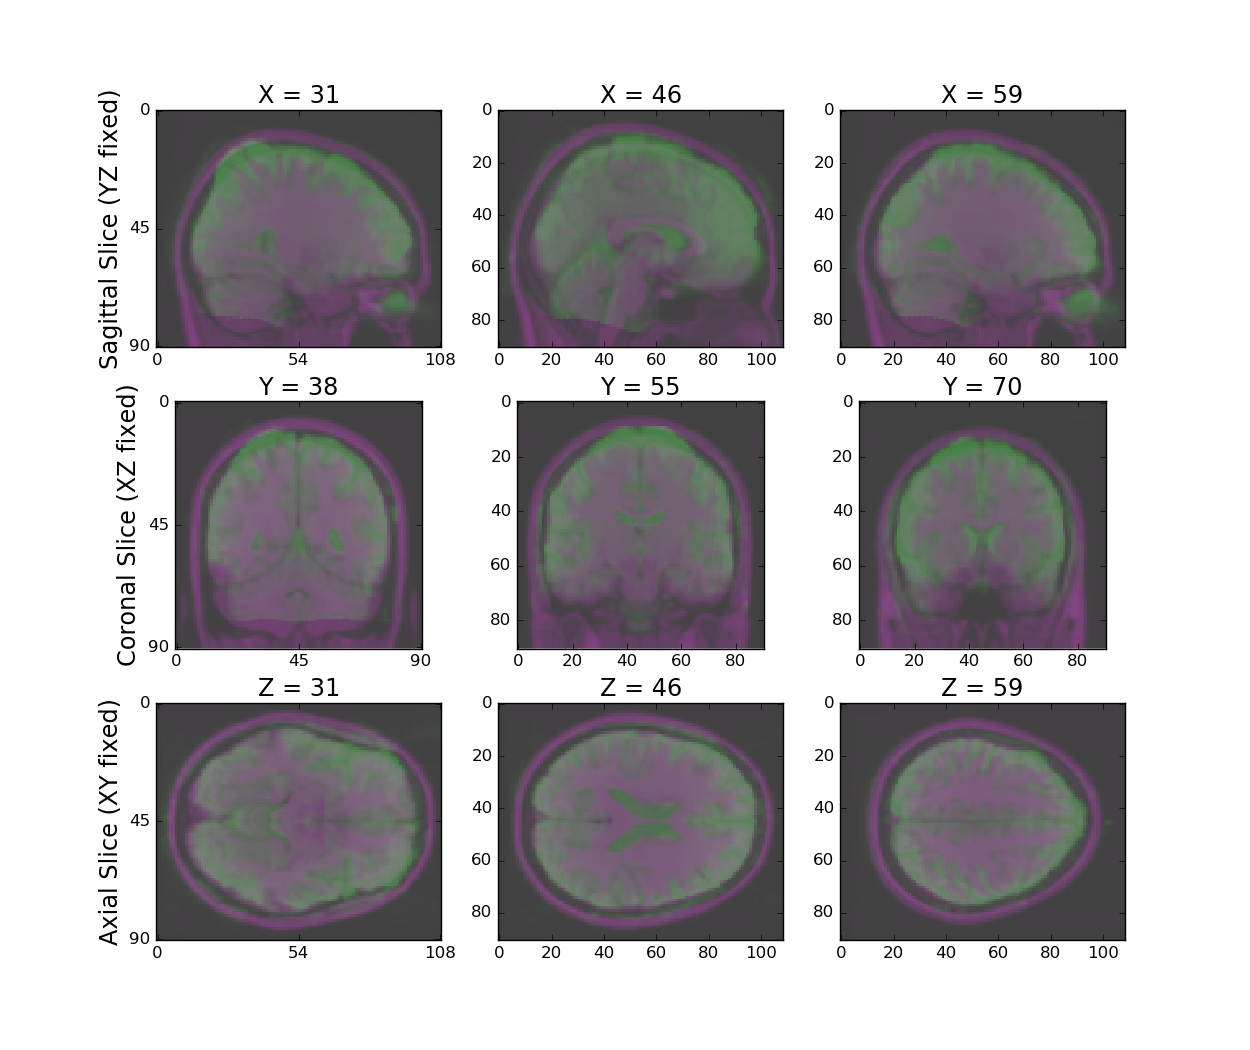

flirt, score = 0.798


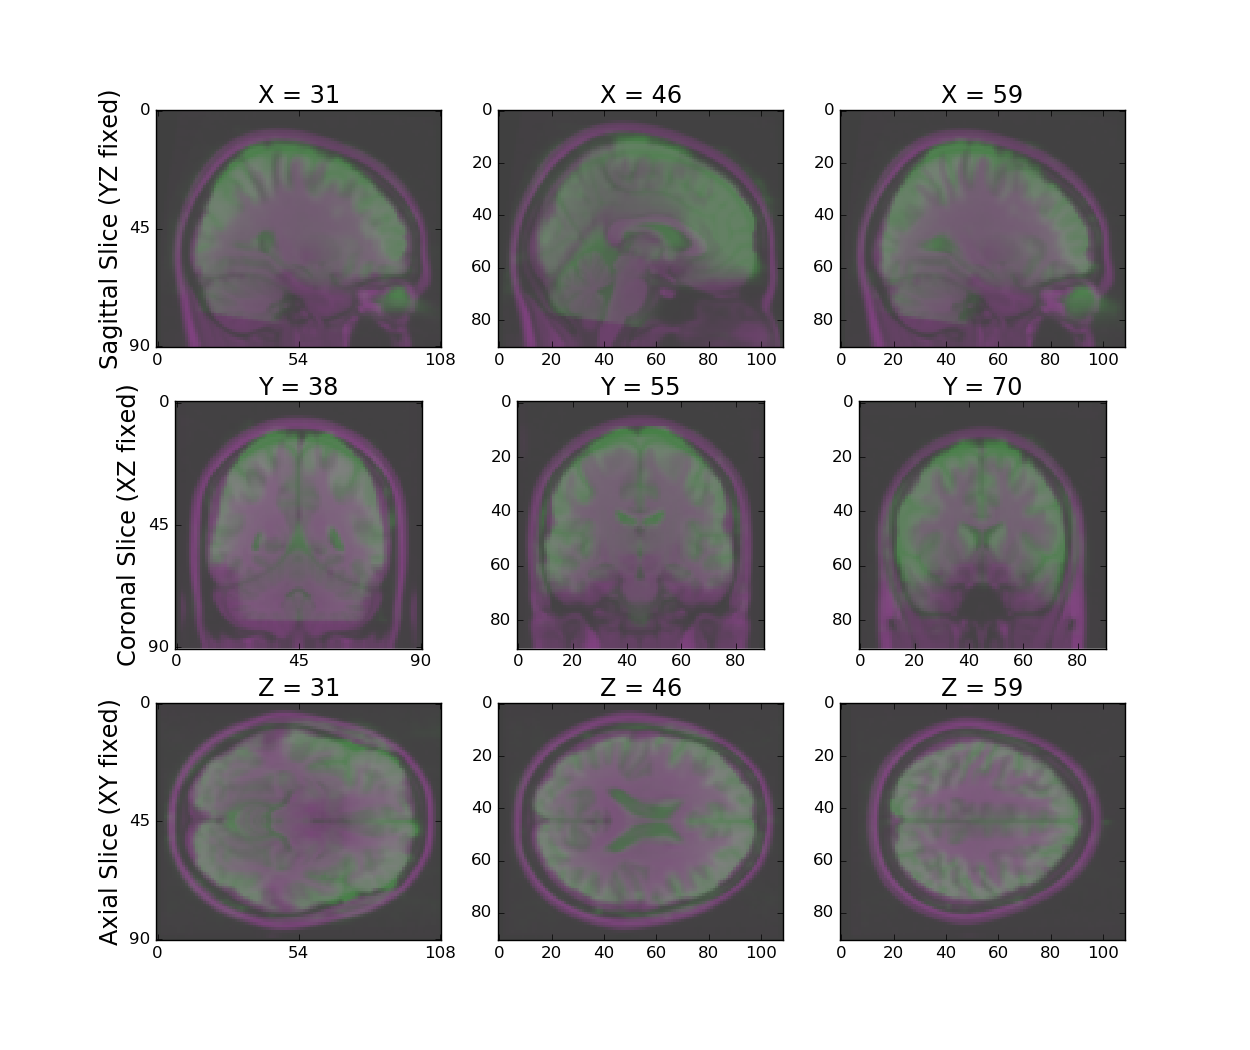

In [23]:
from IPython.display import Image, display

print "fnirt, score = 0.796"
display(Image(filename='/data/NKI_sub/NKI_single/qa/rest/reg/func/align/temp/nonlinear_score_796/rest_preproc_temp-aligned_nonlinear.png'))
from IPython.display import Image, display

print "flirt, score = 0.798"
display(Image(filename='/data/NKI_sub/NKI_single/qa/rest/reg/func/align/temp/linear_score_798/rest_preproc_temp-aligned_linear.png'))


## SOL 1

Note that registration proceeeds as expected. Our fnirt result is good.

fnirt, score = 0.800


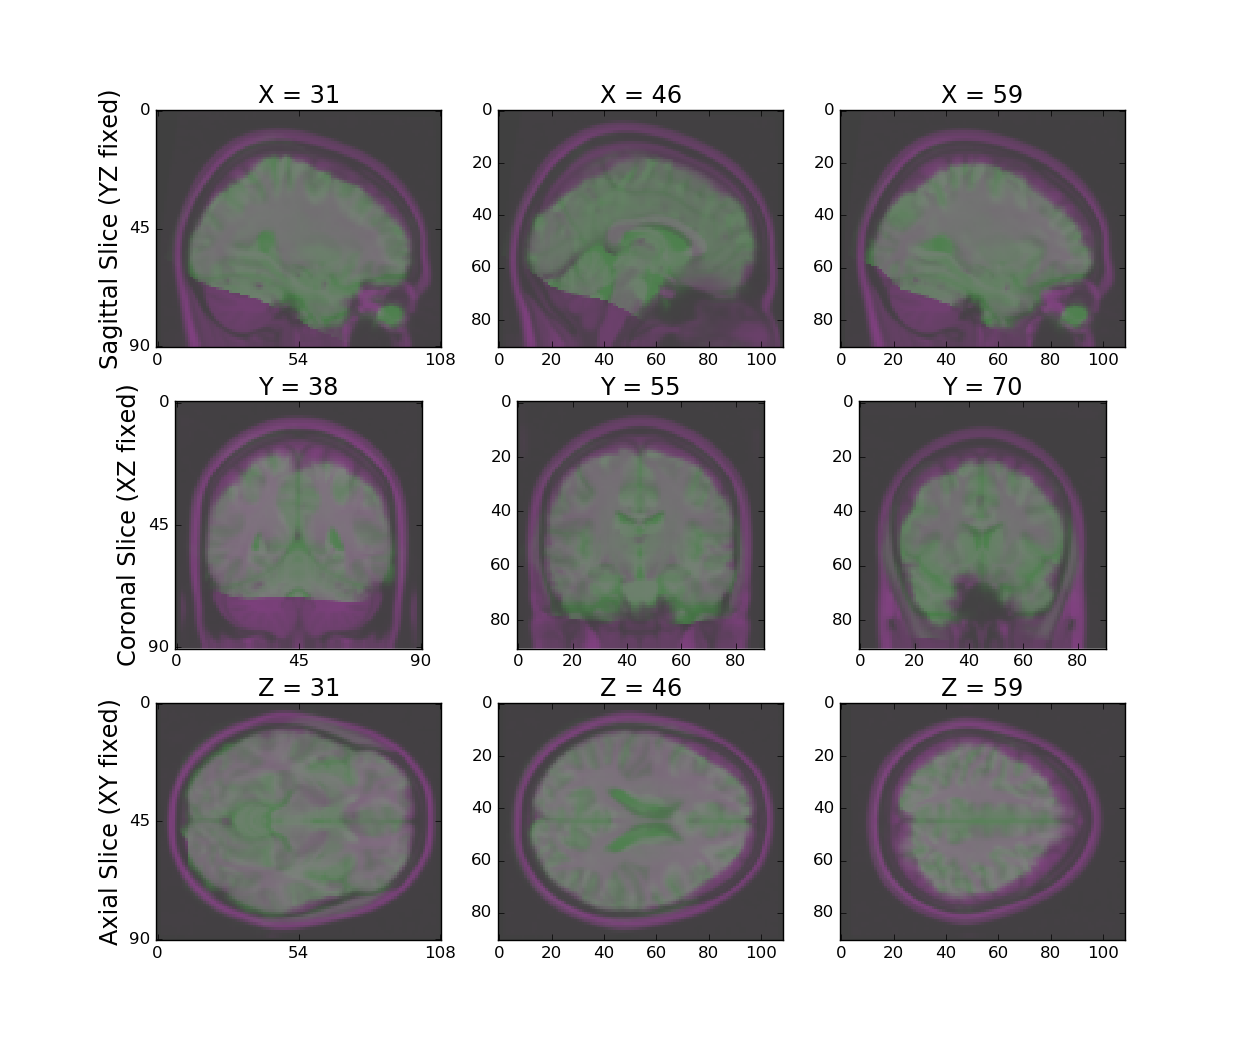

In [24]:
from IPython.display import Image, display

print "fnirt, score = 0.800"
display(Image(filename='/data/sol/sol_single/qa/sub-15_func_run1/reg/func/align/temp/nonlinear_score_800/sub-15_func_run1_preproc_temp-aligned_nonlinear.png'))

## Comments

As we can see, fnirt generally provides a very, very high quality registration to the template, except in one case. However, in that case, flirt does no better really, so there is generally no reason to pick one versus the other. In this situation, it may be valuable to lower the threshold here a bit too, or pick the "best performing" of the two instead of defaulting to one in one situation vs the other in another situation. There may be some good flirt configs to explore here too for the fail situation, or to get a better guess approximation for our fnirt.